In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [3]:
df = pd.read_csv('Support.csv')
lane = df.drop(columns = ['Lane', 'Unnamed: 0', 'Summoner', 'Item_0', 'Item_1', 'Item_2', 'Item_3', 'Item_4', 'Item_5', 'Item_6'])

In [4]:
lane.head()

,Champion,Kills,Deaths,Assists,Killing_Spree,Multikills,Total_Damage,Damage_To_Objectives,Damage_To_Turrets,Damage_Taken,Gold_Earned,Champ_Level,Wards_Bought,Vision_Score,Crowd_Controls
0,30,3,3,3,0,2,9003,2836,0,12184,6745,11,0,14,9
1,43,1,4,1,0,1,7044,502,124,8801,4840,8,5,26,17
2,497,1,2,4,0,1,3300,1198,815,6504,3899,8,3,13,12
3,15,5,2,7,2,1,11130,2108,2108,6331,8335,11,2,4,0
4,59,5,0,9,5,1,6604,12215,2079,10704,8422,11,5,23,18


In [5]:
lane.groupby('Champion').mean().head()

,Kills,Deaths,Assists,Killing_Spree,Multikills,Total_Damage,Damage_To_Objectives,Damage_To_Turrets,Damage_Taken,Gold_Earned,Champ_Level,Wards_Bought,Vision_Score,Crowd_Controls
Champion,,,,,,,,,,,,,,
1,2.683168,2.118812,2.207921,1.900990,0.970297,5793.306931,1600.198020,1401.049505,5870.841584,5574.306931,9.425743,1.237624,8.861386,10.910891
2,3.917713,2.684798,3.050209,2.743375,1.322176,6624.541144,12145.748954,1481.157601,12621.814505,6576.490934,9.658298,2.299861,13.037657,6.748954
3,1.846154,3.196581,5.418803,0.923077,0.846154,4882.418803,1434.529915,1068.367521,8762.940171,4922.427350,8.692308,3.452991,15.358974,17.692308
4,1.787276,2.540755,2.721670,1.023857,0.831014,5414.616302,2213.646123,1934.135189,7536.960239,6231.582505,9.834990,1.500994,9.512922,13.393638
5,3.257426,2.940594,3.336634,2.042904,1.052805,5868.864686,11849.359736,1478.521452,13486.785479,6365.821782,9.613861,2.089109,15.234323,9.537954


In [6]:
model = KMeans(n_clusters = 4).fit(lane)

In [7]:
model.cluster_centers_

array([[1.57270421e+02, 1.15327901e+00, 2.04273380e+00, 2.64066744e+00,
        6.35671323e-01, 6.37902600e-01, 3.52338388e+03, 1.29742714e+03,
        9.24958430e+02, 5.08967157e+03, 4.27896537e+03, 7.70348273e+00,
        1.69906868e+00, 1.04935002e+01, 8.07537835e+00],
       [1.37061809e+02, 2.34145022e+00, 4.18031506e+00, 2.63961039e+00,
        1.16702742e+00, 9.76972102e-01, 6.55086370e+03, 1.98186688e+03,
        7.19927309e+02, 1.19567296e+04, 5.94964701e+03, 9.95045695e+00,
        1.77134440e+00, 1.17238456e+01, 1.03532347e+01],
       [9.93924731e+01, 4.91275660e+00, 1.77639296e+00, 5.07991202e+00,
        3.54569892e+00, 1.40518084e+00, 7.14867155e+03, 1.92387788e+04,
        2.09342253e+03, 1.34493385e+04, 7.73527933e+03, 1.07050342e+01,
        2.45723363e+00, 1.60933529e+01, 9.78152493e+00],
       [1.35247674e+02, 5.26078224e+00, 1.52494715e+00, 4.65676533e+00,
        3.95570825e+00, 1.47758985e+00, 9.57367812e+03, 6.27437939e+03,
        4.59306195e+03, 8.43138446e+0

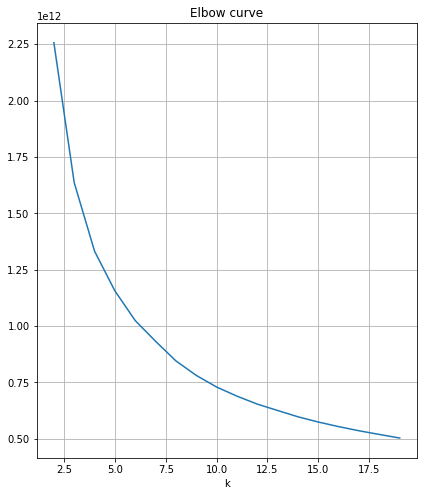

In [8]:
distorsions = []

for k in range(2,20):
    kmeans = KMeans(n_clusters=k, random_state = 301)
    kmeans.fit(lane)
    distorsions.append(kmeans.inertia_)

# Plot values of SSE
plt.figure(figsize=(15,8))
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.plot(range(2, 20), distorsions)
plt.grid(True)

In [9]:
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(lane)
    silhouette_avg = metrics.silhouette_score(lane, cluster_labels)
    silhouette_plot.append(silhouette_avg)

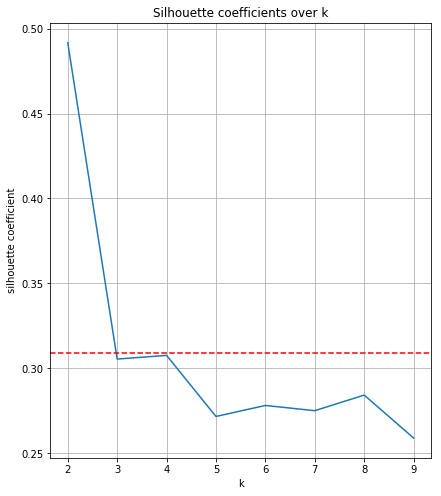

In [10]:
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

In [16]:
k_means = KMeans(n_clusters = 3).fit(lane.groupby('Champion').mean())
cluster_assignments = k_means.predict(lane.groupby('Champion').mean())

In [17]:
cluster_assignments

array([1, 0, 1, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2,
       0, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 2, 2, 1, 2, 2, 1, 1,
       1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 0, 0, 1, 2, 1, 0, 2, 2, 2, 0, 2, 2,
       0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 0, 1, 0,
       2, 0, 0, 2, 1, 1, 0, 2, 2, 1, 2, 0, 0, 2, 2, 1, 2, 1, 1, 2, 0, 2,
       1, 2, 2, 0, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2,
       1, 1, 2, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1], dtype=int32)

In [18]:
clustered = lane.groupby('Champion').mean()

In [19]:
clustered['Cluster'] = cluster_assignments

In [20]:
clustered

,Kills,Deaths,Assists,Killing_Spree,Multikills,Total_Damage,Damage_To_Objectives,Damage_To_Turrets,Damage_Taken,Gold_Earned,Champ_Level,Wards_Bought,Vision_Score,Crowd_Controls,Cluster
Champion,,,,,,,,,,,,,,,
1,2.683168,2.118812,2.207921,1.900990,0.970297,5793.306931,1600.198020,1401.049505,5870.841584,5574.306931,9.425743,1.237624,8.861386,10.910891,1
2,3.917713,2.684798,3.050209,2.743375,1.322176,6624.541144,12145.748954,1481.157601,12621.814505,6576.490934,9.658298,2.299861,13.037657,6.748954,0
3,1.846154,3.196581,5.418803,0.923077,0.846154,4882.418803,1434.529915,1068.367521,8762.940171,4922.427350,8.692308,3.452991,15.358974,17.692308,1
4,1.787276,2.540755,2.721670,1.023857,0.831014,5414.616302,2213.646123,1934.135189,7536.960239,6231.582505,9.834990,1.500994,9.512922,13.393638,2
5,3.257426,2.940594,3.336634,2.042904,1.052805,5868.864686,11849.359736,1478.521452,13486.785479,6365.821782,9.613861,2.089109,15.234323,9.537954,0
6,2.111111,2.625000,1.194444,1.416667,0.833333,5249.958333,2546.486111,1251.125000,7778.944444,5062.319444,9.152778,1.277778,8.333333,8.333333,1
7,3.348485,2.147727,2.640152,2.185606,1.034091,7173.106061,1487.950758,1376.401515,7787.174242,5981.178030,10.159091,1.696970,10.613636,9.719697,2
8,1.961712,2.268018,1.569820,1.436937,0.817568,5895.939189,1594.646396,1227.362613,10155.000000,5595.644144,10.002252,1.157658,7.698198,1.139640,2
9,2.322034,3.076271,4.313559,1.432203,0.838983,5809.805085,2454.254237,803.110169,8446.161017,5151.957627,8.364407,3.296610,17.262712,44.644068,2
